In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [79]:
# import dataset
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [80]:
#find missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [82]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [83]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df0 = df.copy()

In [85]:
df = df.rename(columns={
    'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'Family History with Overweight',
    'FAVC': 'Frequent consumption of high caloric food',
    'FCVC': 'Frequency of consumption of vegetables',
    'NCP': 'Number of main meals',
    'CAEC': 'Consumption of food between meals',
    'SMOKE': 'Smoke',
    'CH2O': 'Consumption of water daily',
    'SCC': 'Calories consumption monitoring',
    'FAF': 'Physical activity frequency',
    'TUE': 'Time using technology devices',
    'CALC': 'Consumption of alcohol',
    'MTRANS': 'Transportation used',
    'NObeyesdad': 'Obesity'
}, inplace=False)
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [86]:
# Calculate BMI and round to 1 decimal place
df['BMI'] = (df['Weight'] / (df['Height'] ** 2)).round(1)

# Display the updated dataframe to check
df.head()


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.3


In [87]:
# Replace underscores with spaces in 'Obesity' and 'Transportation used'
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

In [88]:
df0 = df.copy()

In [89]:
# Convert 'Height' from meters to centimeters
df['Height'] = df['Height'] * 100

# Round 'Height', 'Weight', and 'Age' columns to 1 decimal place
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)

# Display the DataFrame to verify the changes
df.head()


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,BMI
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.4
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.2
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.8
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.9
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.3


In [90]:
# Save the updated DataFrame with the 'BMI' column to a new CSV file
df.to_csv('updated_dataset_with_bmi.csv', index=False)


Age                                       0.244225
Height                                    0.131811
Weight                                    0.934793
Frequency of consumption of vegetables    0.263554
Number of main meals                      0.039842
Consumption of water daily                0.144244
Physical activity frequency              -0.177531
Time using technology devices            -0.099655
BMI                                       1.000000
Name: BMI, dtype: float64


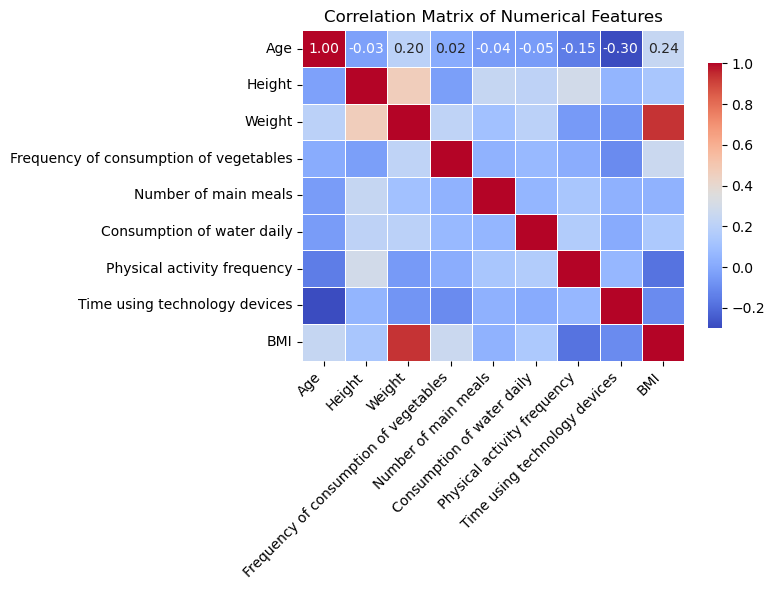

In [91]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Display the correlation with BMI
correlation_with_bmi = correlation_matrix['BMI']
print(correlation_with_bmi)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.8}) 
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

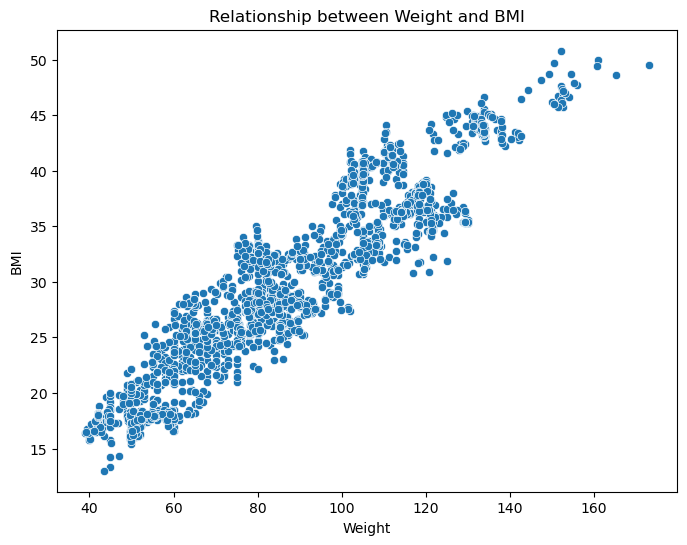

In [92]:
# Scatter plot for Weight vs. BMI
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Weight', y='BMI')
plt.title('Relationship between Weight and BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.show()

In [93]:
# Calculate the correlation coefficient between Age and BMI
age_bmi_corr = df['Weight'].corr(df['BMI'])
print(f"Correlation coefficient between Age and BMI: {age_bmi_corr}")

Correlation coefficient between Age and BMI: 0.9347928839008138


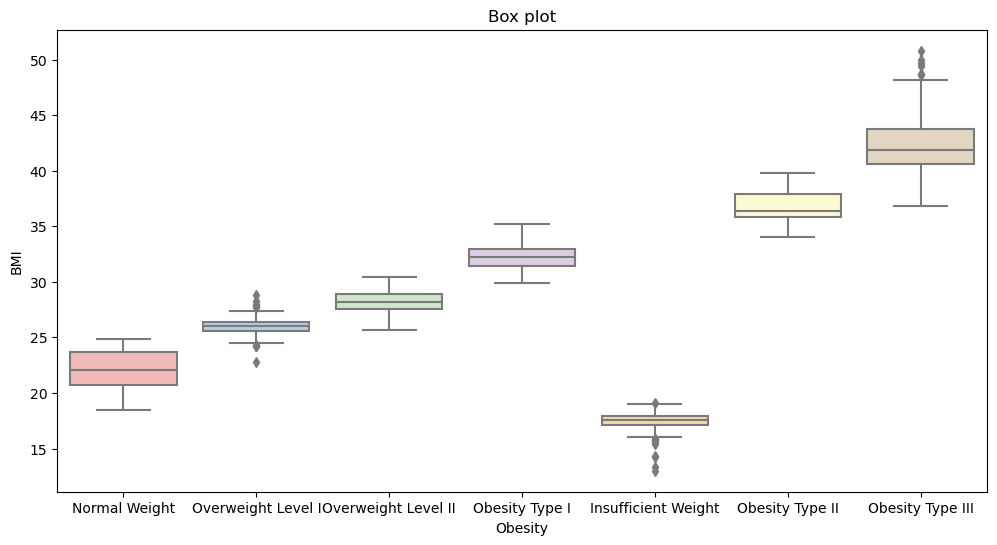

In [94]:
# box plot with 'Obesity_Condition' on the x-axis and 'BMI' on the y-axis
plt.figure(figsize=(12,6))  
sns.boxplot(x='Obesity', y='BMI', data=df, palette='Pastel1')  
plt.title("Box plot")  
plt.show()


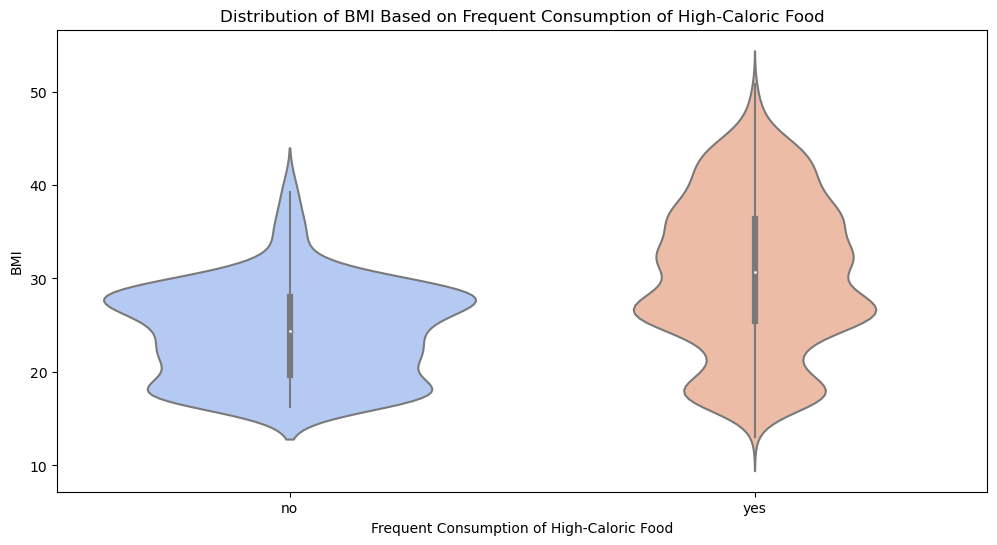

In [95]:
plt.figure(figsize=(12,6))

# violin plot to visualize the distribution of BMI for FAVC (high-calorie food consumption)
sns.violinplot(x='Frequent consumption of high caloric food', y='BMI', data=df, palette='coolwarm')

plt.title("Distribution of BMI Based on Frequent Consumption of High-Caloric Food")
plt.xlabel('Frequent Consumption of High-Caloric Food')
plt.ylabel('BMI')
plt.show()


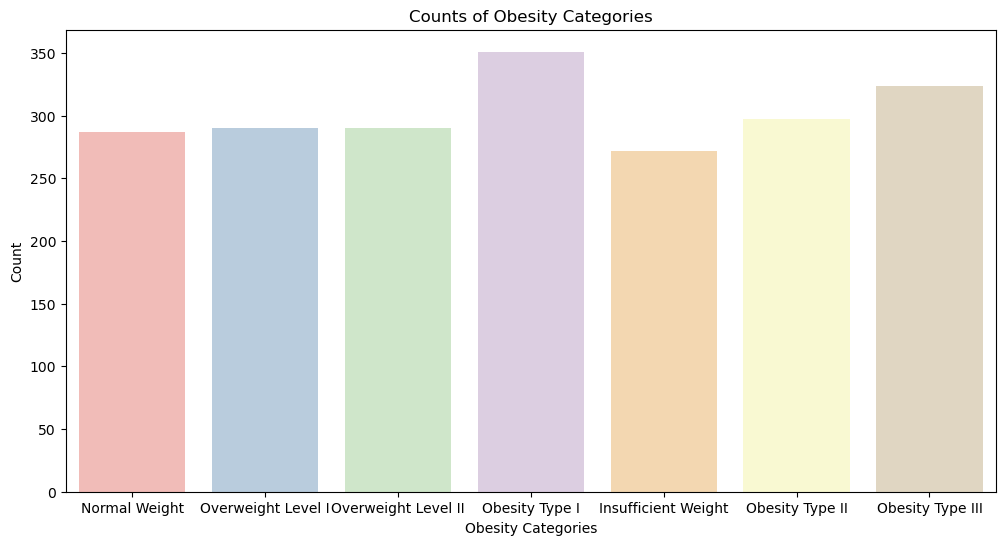

In [96]:
# bar plot of the counts for each category in 'Obesity'
plt.figure(figsize=(12, 6))
sns.countplot(x='Obesity', data=df, palette='Pastel1')
plt.title('Counts of Obesity Categories')
plt.xlabel('Obesity Categories')
plt.ylabel('Count')
plt.show()

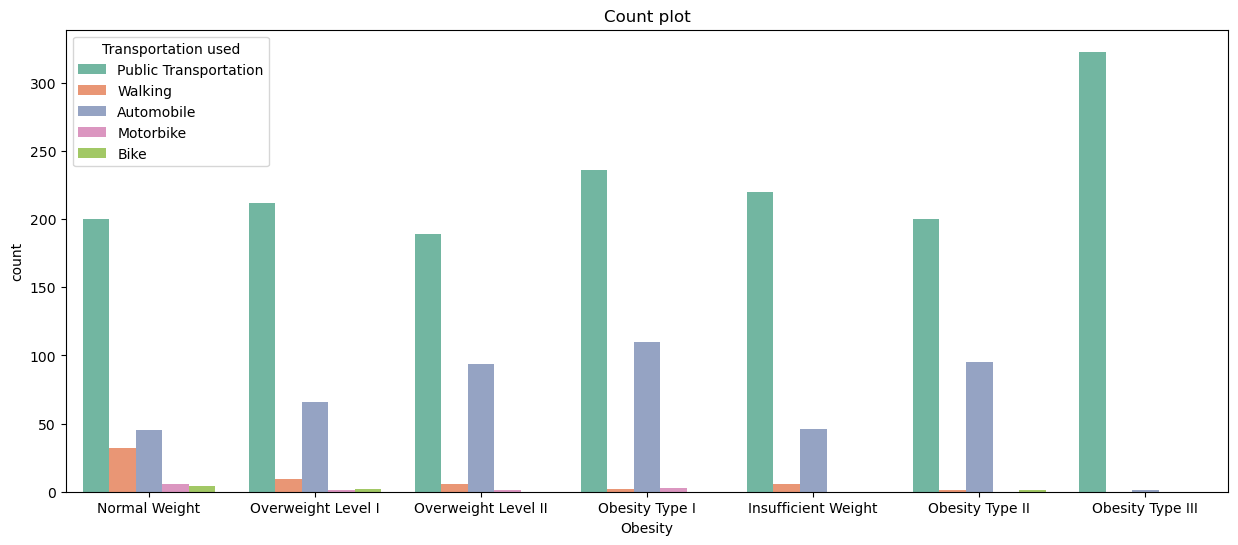

In [97]:
plt.figure(figsize=(15,6))
sns.countplot(x='Obesity', hue='Transportation used', data=df, palette='Set2' )
plt.title("Count plot")
plt.show()

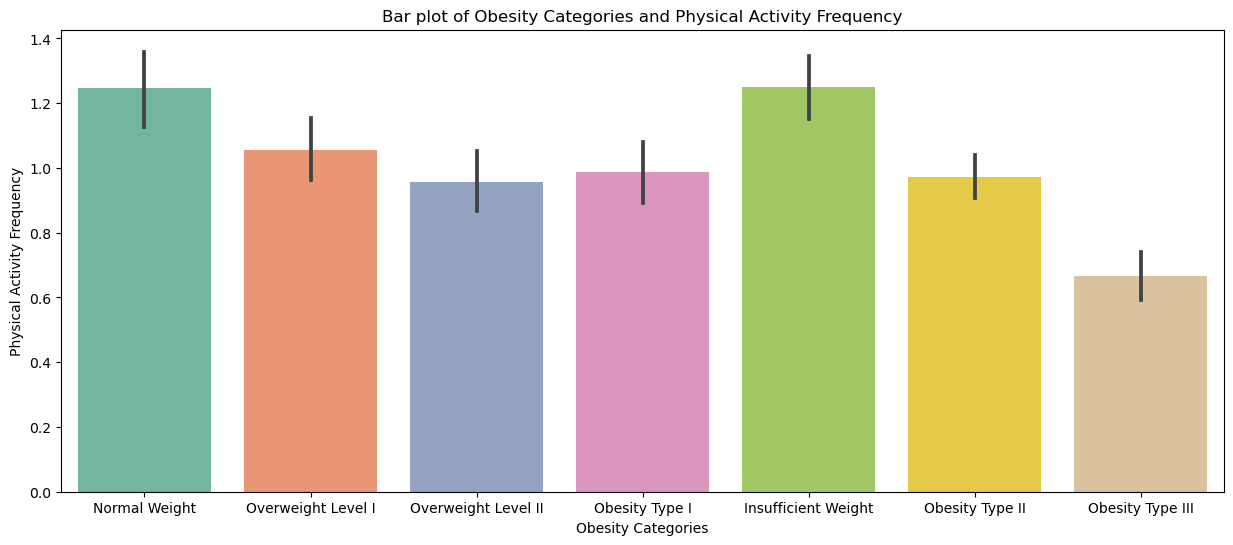

In [98]:
plt.figure(figsize=(15,6))

# bar plot of 'Obesity' vs 'Physical activity frequency'
sns.barplot(x='Obesity', y='Physical activity frequency', data=df, palette='Set2')

plt.title("Bar plot of Obesity Categories and Physical Activity Frequency")
plt.xlabel("Obesity Categories")
plt.ylabel("Physical Activity Frequency")
plt.show()


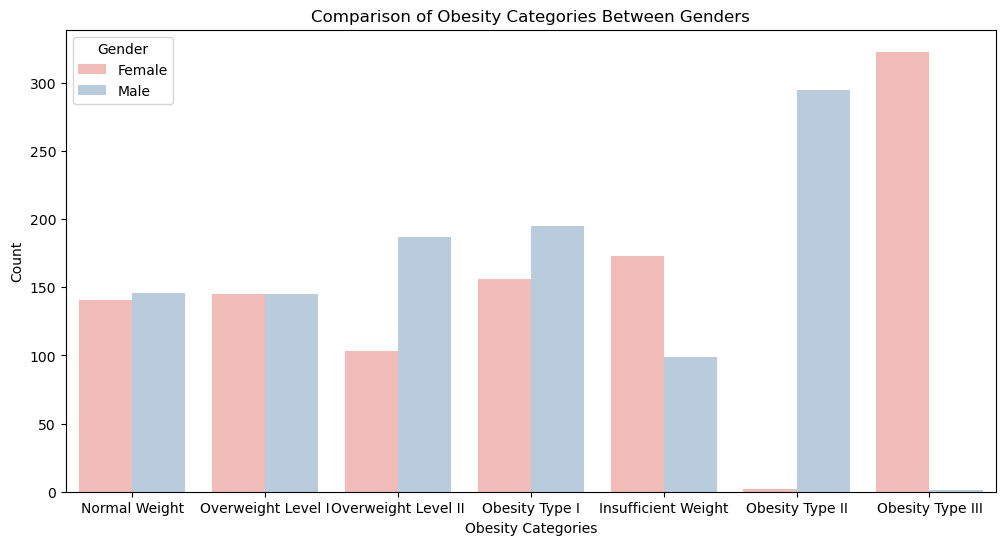

In [99]:
# count plot to compare obesity categories between genders
plt.figure(figsize=(12, 6))
sns.countplot(x='Obesity', hue='Gender', data=df, palette='Pastel1')
plt.title('Comparison of Obesity Categories Between Genders')
plt.xlabel('Obesity Categories')
plt.ylabel('Count')
plt.show()